In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)

In [3]:
df = df.replace('?', np.nan)
df = df.dropna()
df['target'] = np.where(df['target'] > 0, 1, 0)

In [4]:
# Splitting the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Binarizing the features
binarizer = Binarizer()
X_train = binarizer.fit_transform(X_train)
X_test = binarizer.transform(X_test)

In [6]:
# Training the Naive Bayes model (BernoulliNB)
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [7]:
# Making predictions on the testing set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

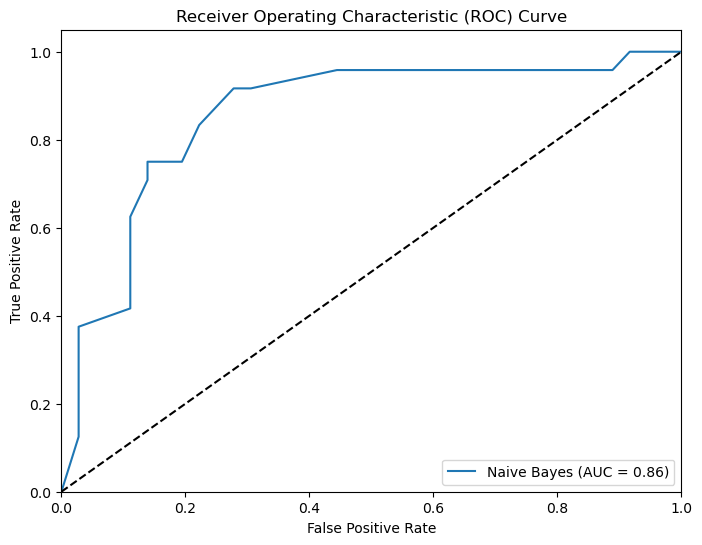

Accuracy: 0.8
Confusion Matrix:
 [[31  5]
 [ 7 17]]
AUC: 0.8576388888888888
CRP:               precision    recall  f1-score   support

           0       0.82      0.86      0.84        36
           1       0.77      0.71      0.74        24

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



In [8]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("AUC:", auc)
print("CRP:", classification_report(y_test, y_pred))
